In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
# df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [4]:
df.isnull().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

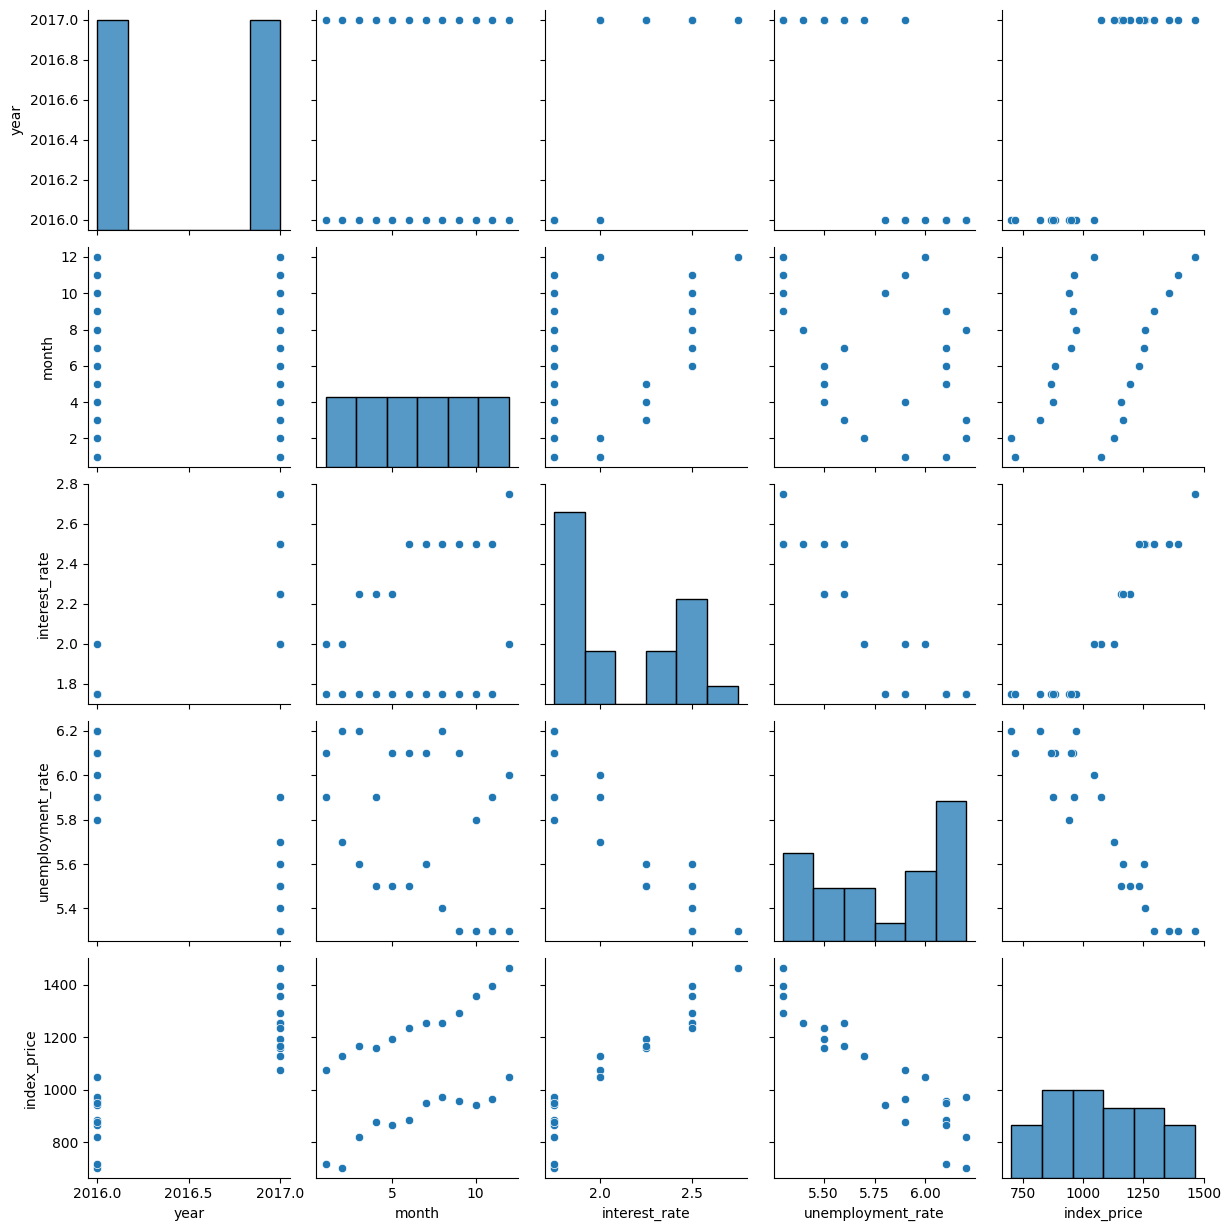

In [5]:
# visualization
import seaborn as sns
sns.pairplot(df)

In [6]:
df.corr()

,year,month,interest_rate,unemployment_rate,index_price
year,1.000000e+00,7.887056e-14,0.882851,-0.877000,0.863232
month,7.887056e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


Text(0.5, 0, 'interest_rate')

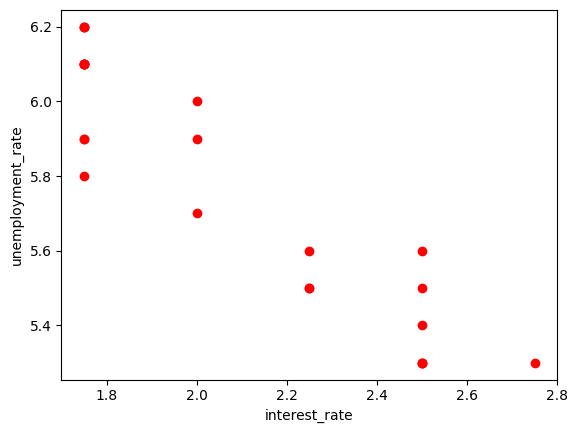

In [10]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')
plt.ylabel('unemployment_rate')
plt.xlabel('interest_rate')

In [11]:
#get dependent and independent variable
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
X.head()

,year,month,interest_rate,unemployment_rate
0,2017,12,2.75,5.3
1,2017,11,2.50,5.3
2,2017,10,2.50,5.3
3,2017,9,2.50,5.3
4,2017,8,2.50,5.4


In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

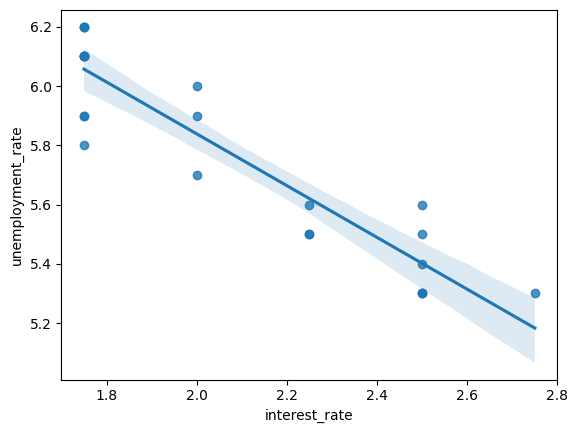

In [14]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1581.880207850357
R-squared: 0.960321500255588
